<a href="https://www.kaggle.com/code/romanniki/house-prices-rf-se-xgb?scriptVersionId=186734912" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

## Data Preparation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression


In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
# Display the number of null values in each column

null_counts = train.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


## Analysing

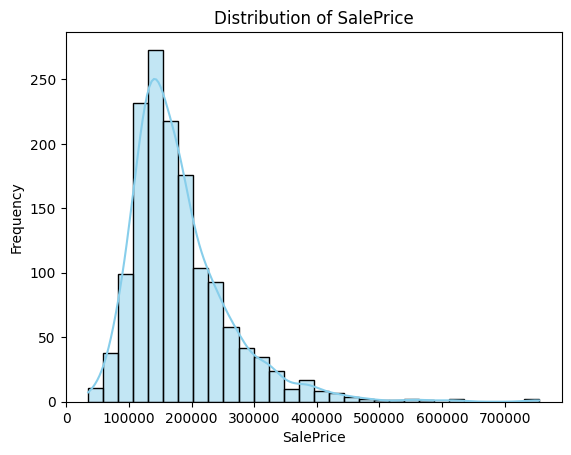

In [7]:
# Let's look at the Sale Price Distribution

sns.histplot(train['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

More common price is beetween 100 000 and 200 000. 

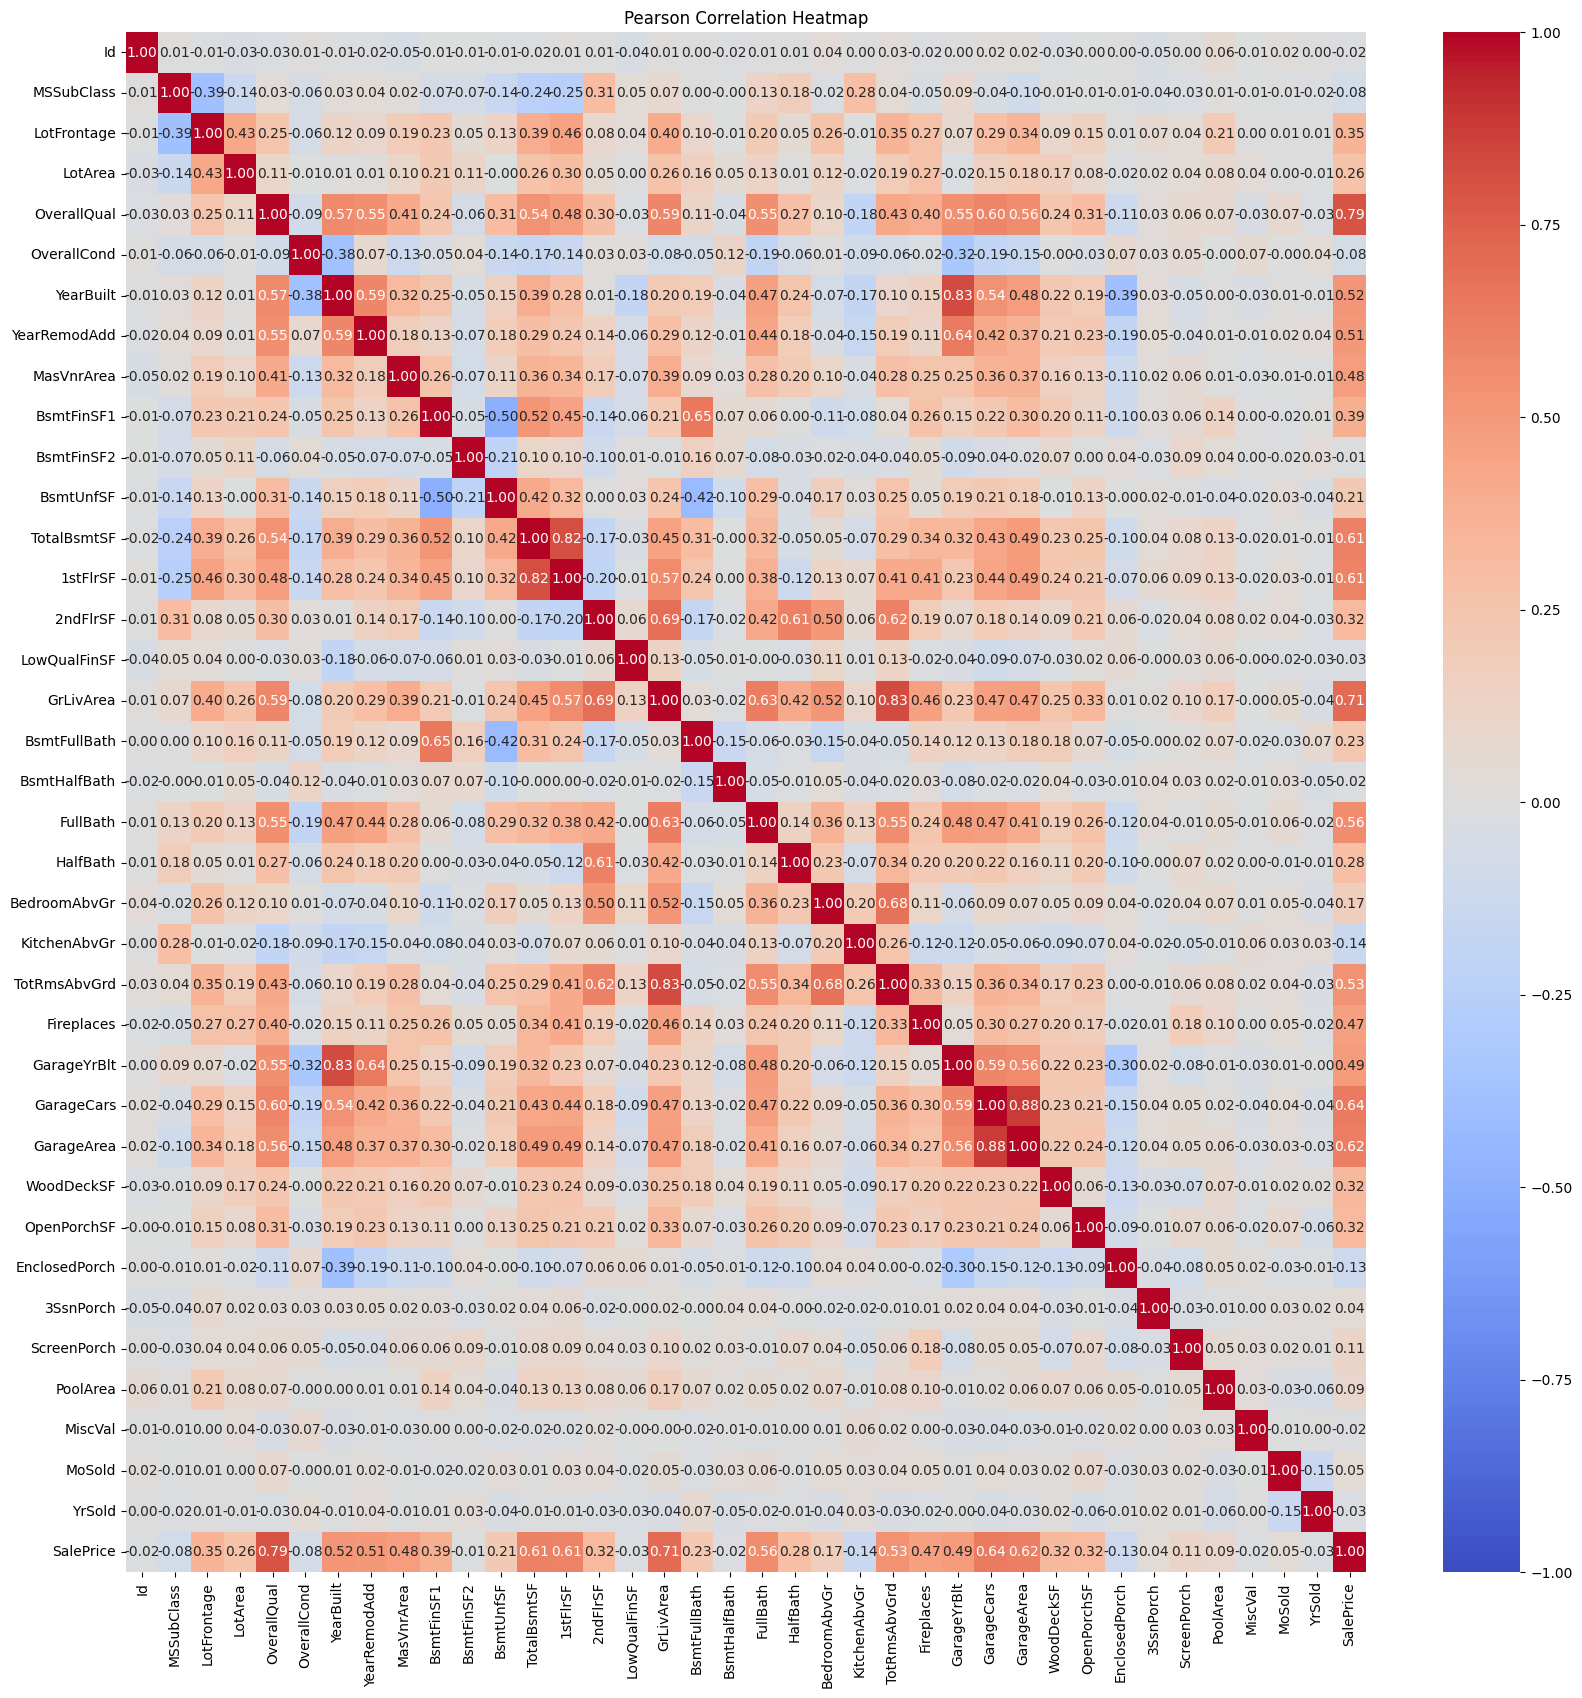

In [8]:
# Correlation matrix

numeric_columns = train.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap")
plt.show()

That's too much of an info to build a prediction model. Let's take only essentials

In [9]:
selected_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                     'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
                     'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 
                     'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 
                     'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF']
selected_df = train[selected_columns]


And now let's make a visualization

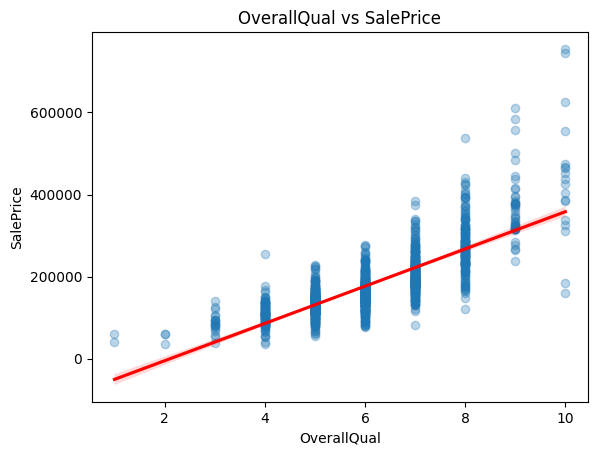

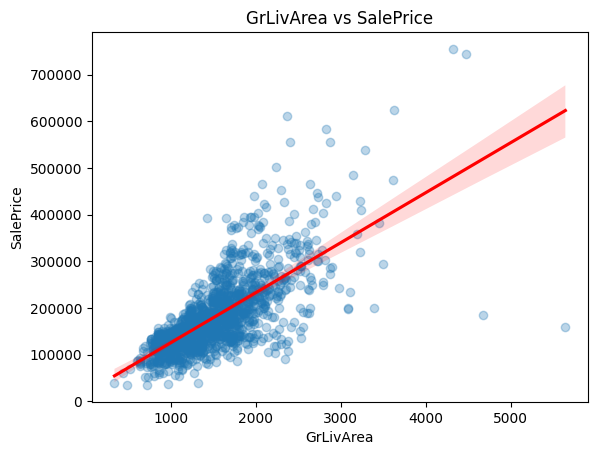

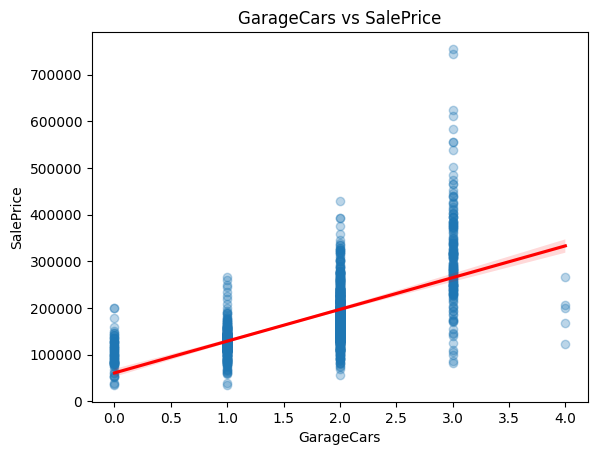

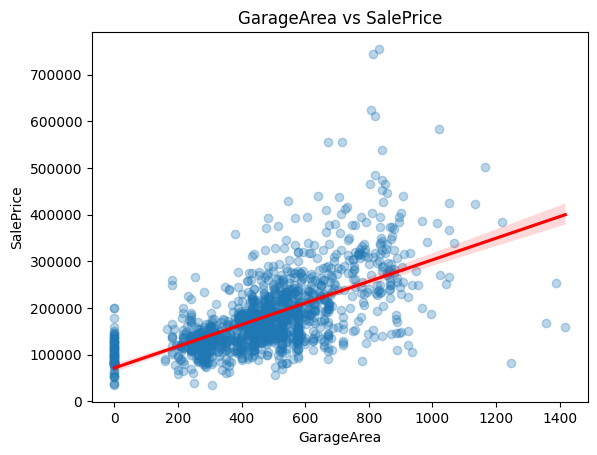

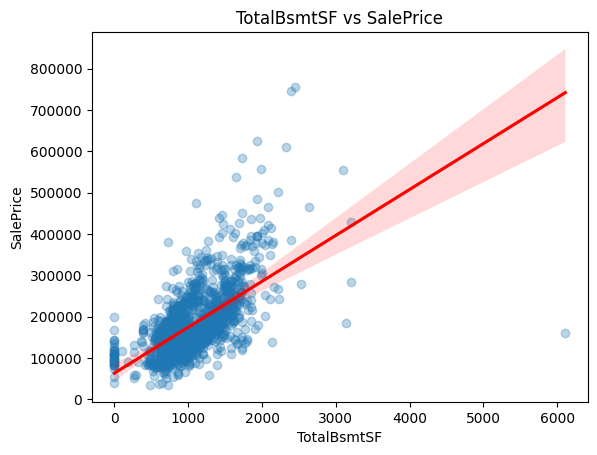

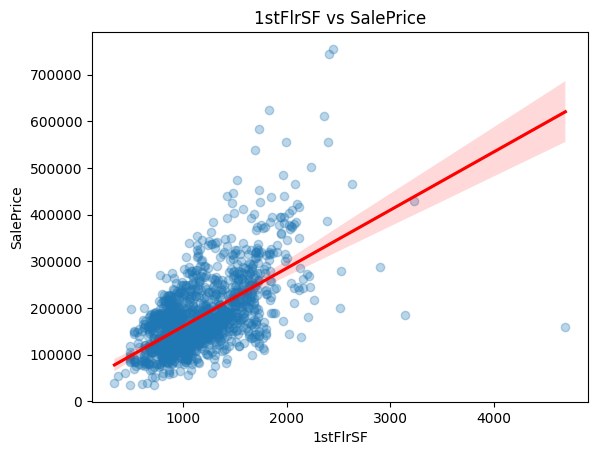

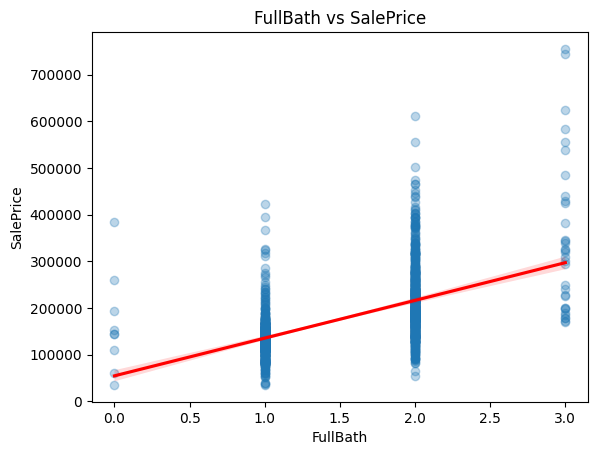

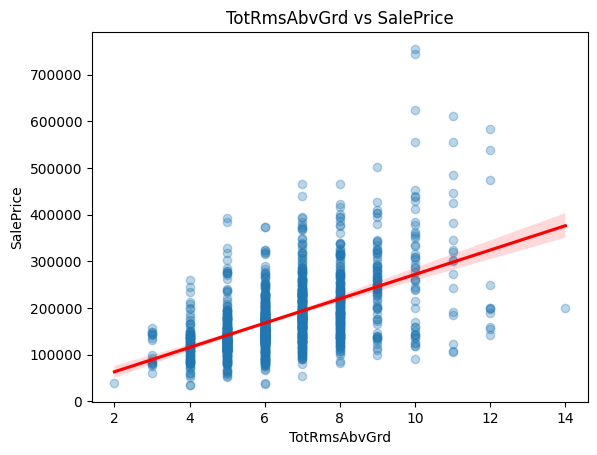

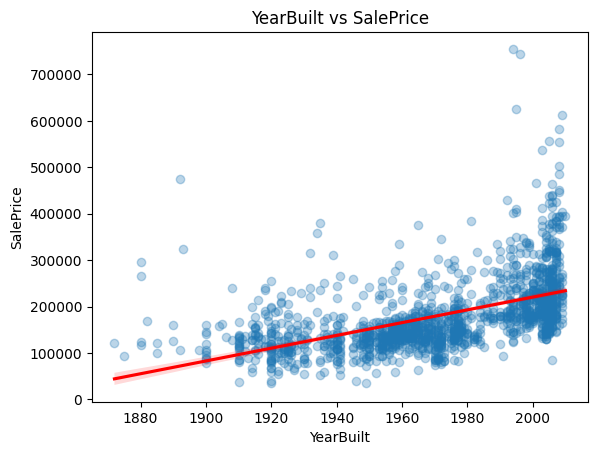

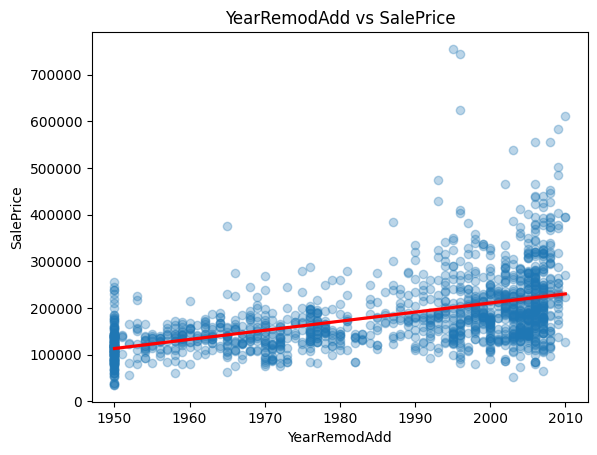

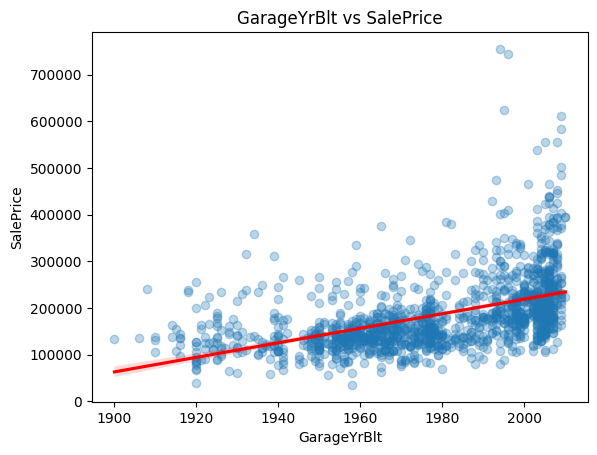

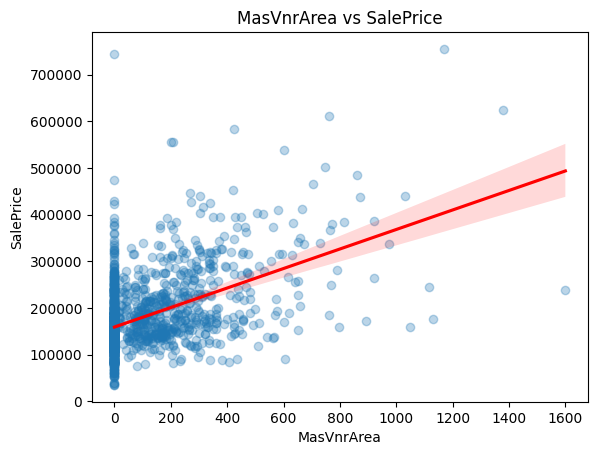

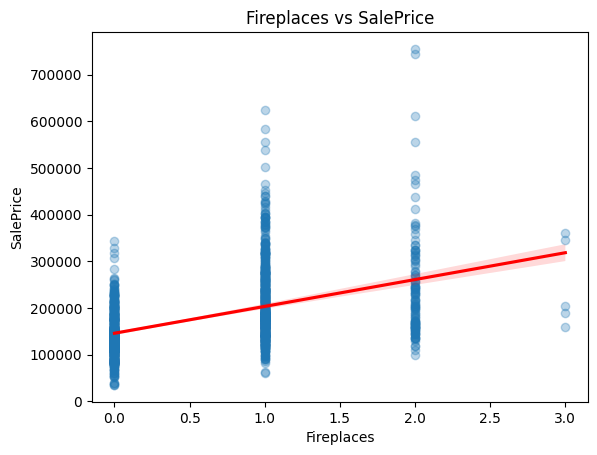

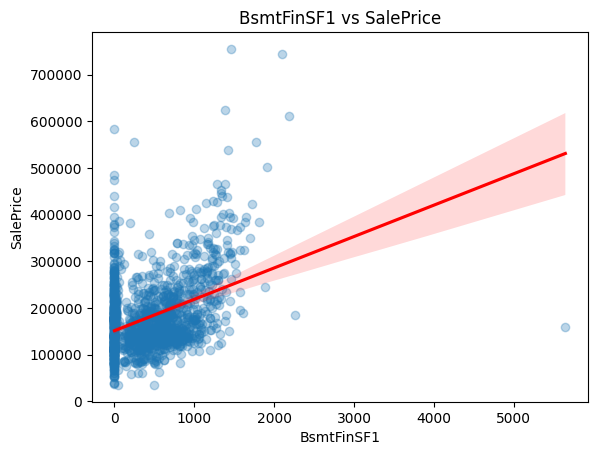

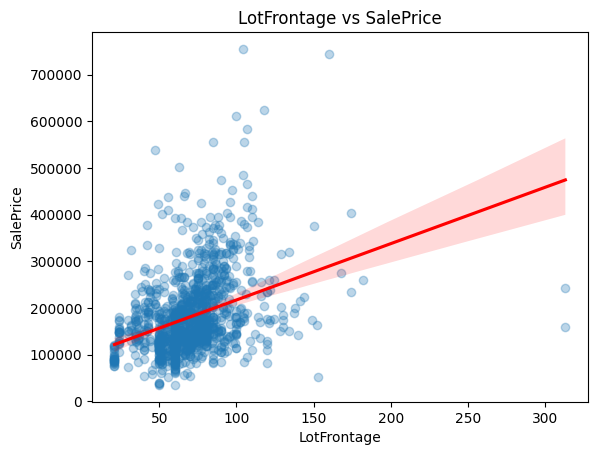

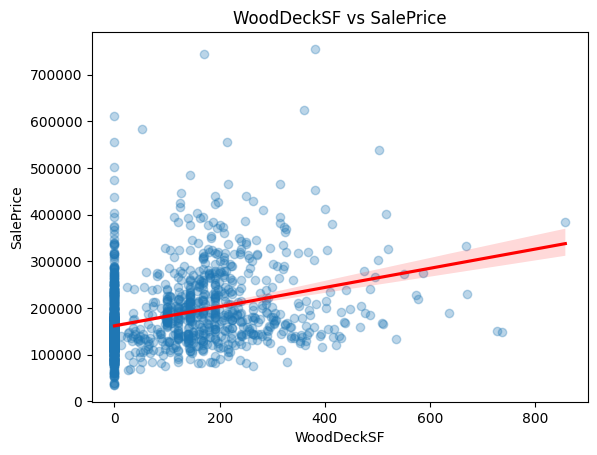

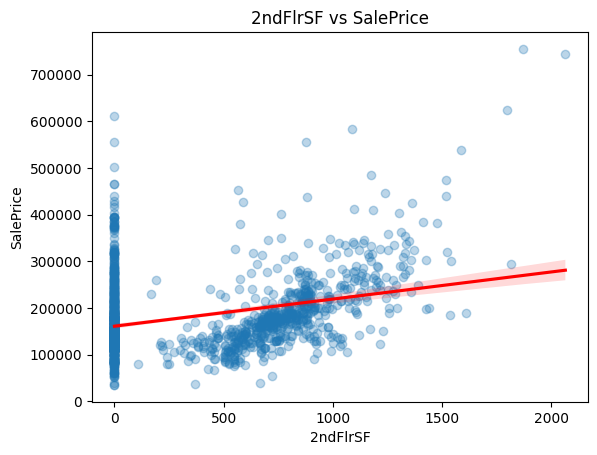

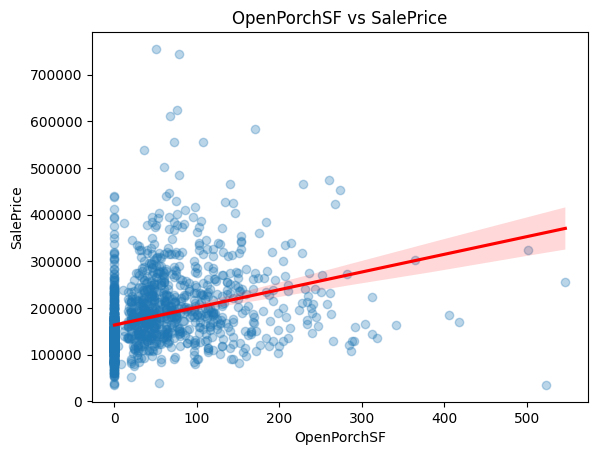

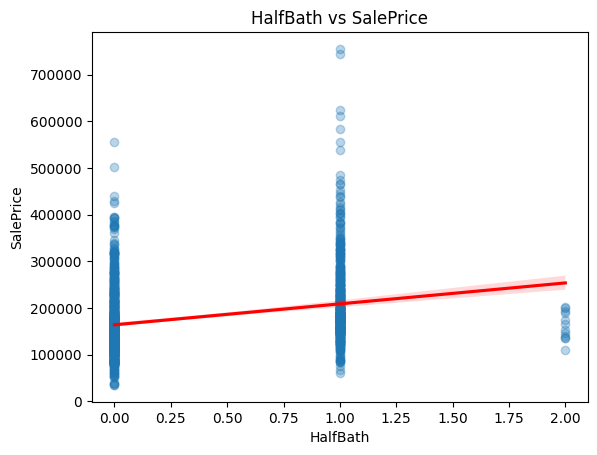

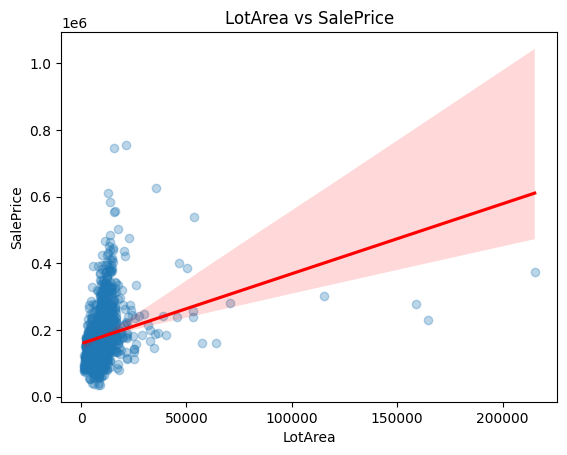

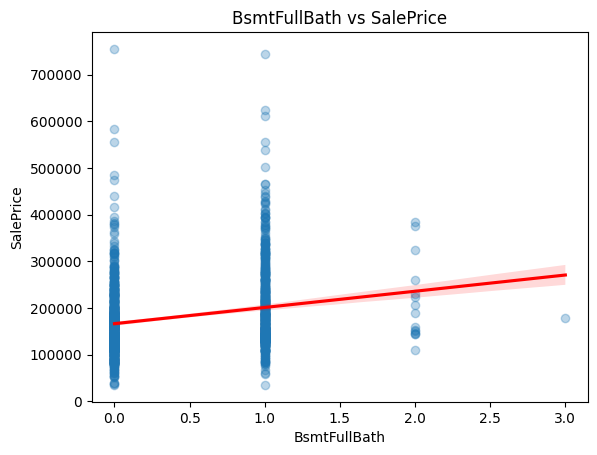

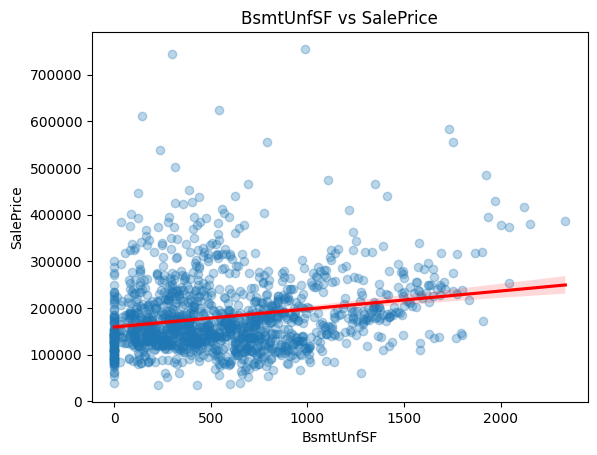

In [10]:
for column in selected_columns[1:]:  # Exclude 'SalePrice' from the loop
    sns.regplot(x=column, y='SalePrice', data=selected_df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    plt.title(f'{column} vs SalePrice')
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.show()

And one more correlation map for the strongest connection with the Price

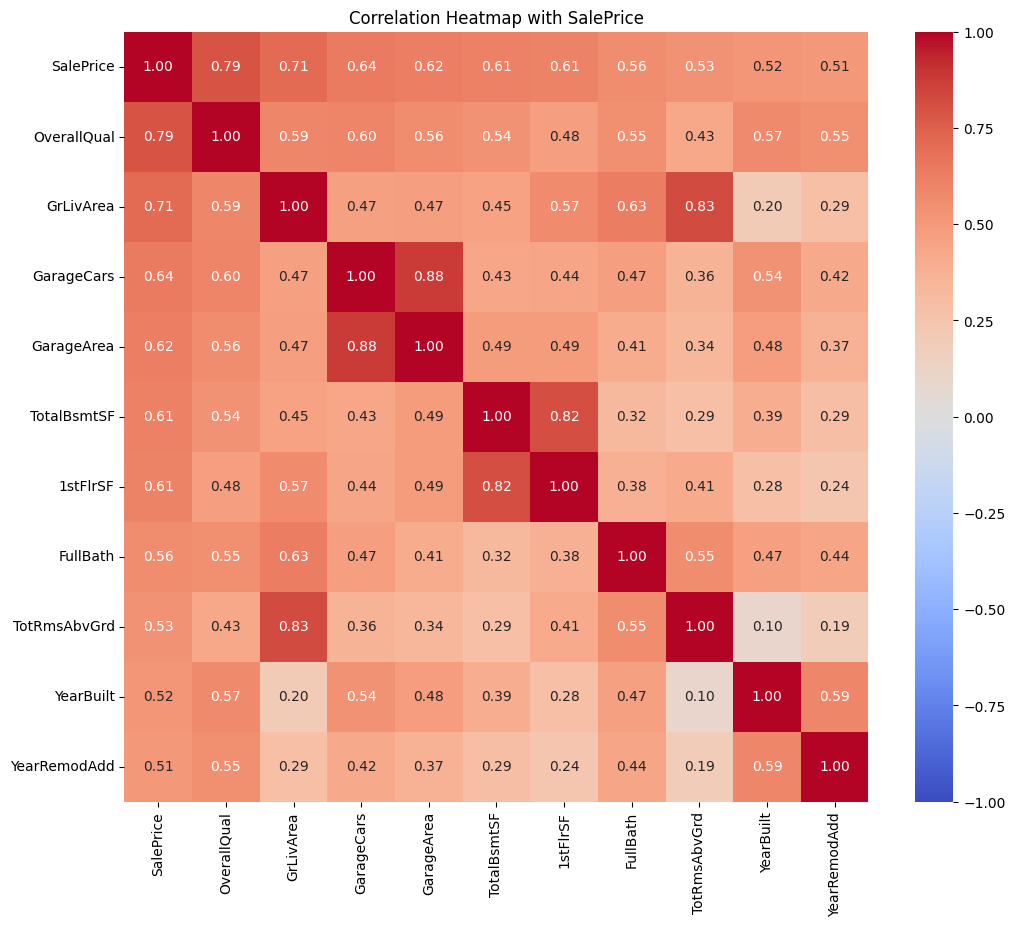

In [11]:
numeric_columns = train.select_dtypes(include=['int64', 'float64'])
correlation_with_saleprice = numeric_columns.corr()['SalePrice'].sort_values(ascending=False)
high_corr_features = correlation_with_saleprice[abs(correlation_with_saleprice) > 0.5]
high_corr_matrix = numeric_columns[high_corr_features.index].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap with SalePrice")
plt.show()


## Train

In [12]:
X = selected_df.drop('SalePrice', axis=1)
y = selected_df['SalePrice']

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

X_processed = pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


## Random Forest

In [13]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor - Mean Squared Error: {mse_rf}')
print(f'Random Forest Regressor - Root Mean Squared Error: {rmse_rf}')
print(f'Random Forest Regressor - R-squared: {r2_rf}')


Random Forest Regressor - Mean Squared Error: 847182164.923192
Random Forest Regressor - Root Mean Squared Error: 29106.393883873556
Random Forest Regressor - R-squared: 0.8895506994044948


## Stacked Ensemble model

In [14]:
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

meta_model = LinearRegression()
model_stacked = StackingRegressor(estimators=base_models, final_estimator=meta_model)
model_stacked.fit(X_train, y_train)

y_pred_stacked = model_stacked.predict(X_test)
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
rmse_stacked = mean_squared_error(y_test, y_pred_stacked, squared=False)
r2_stacked = r2_score(y_test, y_pred_stacked)

print(f'Stacked Ensemble Model - Mean Squared Error: {mse_stacked}')
print(f'Stacked Ensemble Model - Root Mean Squared Error: {rmse_stacked}')
print(f'Stacked Ensemble Model - R-squared: {r2_stacked}')


Stacked Ensemble Model - Mean Squared Error: 755575334.6570557
Stacked Ensemble Model - Root Mean Squared Error: 27487.73062035234
Stacked Ensemble Model - R-squared: 0.9014937156194115


## XGBoost

In [15]:
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Xtreme Gradient Boosting (XGBoost) - Mean Squared Error: {mse_xgb}')
print(f'Xtreme Gradient Boosting (XGBoost) - Root Mean Squared Error: {rmse_xgb}')
print(f'Xtreme Gradient Boosting (XGBoost) - R-squared: {r2_xgb}')


Xtreme Gradient Boosting (XGBoost) - Mean Squared Error: 820241980.6102514
Xtreme Gradient Boosting (XGBoost) - Root Mean Squared Error: 28639.866979618662
Xtreme Gradient Boosting (XGBoost) - R-squared: 0.8930629599766329


## Evaluation

In [16]:
test_selected = test[selected_columns[1:]].copy()
test_selected_processed = pipeline.transform(test_selected)

# Random Forest Regressor Submission
predictions_rf = model_rf.predict(test_selected_processed)
submission_rf = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions_rf})
submission_rf.to_csv('submission_rf.csv', index=False)

# Stacked Ensemble Model Submission
predictions_stacked = model_stacked.predict(test_selected_processed)
submission_stacked = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions_stacked})
submission_stacked.to_csv('submission_stacked.csv', index=False)

# XGBoost Submission
predictions_xgb = model_xgb.predict(test_selected_processed)
submission_xgb = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions_xgb})
submission_xgb.to_csv('submission_xgb.csv', index=False)
